In [1]:
# packages
import numpy as np #math operations
import time #time tracking
import matplotlib.pyplot as plt #plots

# 1D spin-1 Heisenberg model

###  <u> Hamiltonian

$\quad$ Consider a 1D chain, with open boundary conditions, of $s=1$ spins interacting via an isotropic nearest-neighbor exchange $J$, as depicted below.

<img src="spin1_Heisenberg_chain.png" width=400 />

The Hamiltonian is given by

$$
\hat{\mathcal{H}} = J \sum_{j=1}^{N-1} \hat{\vec{S}}_j \cdot \hat{\vec{S}}_{j+1},
$$
where $N$ is the number of spins and $\hat{\vec{S}}_j = (\hat{S}^x_j, \hat{S}^y_j, \hat{S}^z_j)$ is the vector of spin-1 operators at site $j$. 

$\quad$ Straightforward manipulation gives

$$
\hat{\mathcal{H}} = J \sum_{j=1}^{N-1} \left[ \hat{S}^z_j \hat{S}^z_{j+1} 
    + \frac{1}{2} \left( \hat{S}^+_j \hat{S}^-_{j+1} + \hat{S}^-_j \hat{S}^+_{j+1} \right) \right],
$$
where $\hat{S}^\pm_j = \hat{S}^x_j \pm \mathrm{i} \hat{S}^y_j$ are the spin ladder operators.

$\quad$ In what follows, we consider the antiferromagnetic case, $J>0$. For simplicity, we set $J=1$.

### <u> Clarifications</u>
$\quad$ The spin-1 operators can be explicitly written as    
$$
\hat{S}^x_j = \frac{1}{\sqrt{2}} \pmatrix{0 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 1 & 0} , \quad 
\hat{S}^y_j = \frac{\mathrm{i}}{\sqrt{2}} \pmatrix{0 & -1 & 0 \\ 1 & 0 & -1 \\ 0 & 1 & 0}, \quad 
\hat{S}^z_j = \pmatrix{1 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & -1},
$$
in the basis $\{ |s^z_j\rangle \} = \{ |+1\rangle,|0\rangle,|-1\rangle \}$. This leads to the following spin ladder operators:
$$
\hat{S}^+_j = \sqrt{2} \pmatrix{0 & 1 & 0 \\ 0 & 0 & 1 \\ 0 & 0 & 0} , \quad 
\hat{S}^-_j = \sqrt{2} \pmatrix{0 & 0 & 0 \\ 1 & 0 & 0 \\ 0 & 1 & 0}.
$$
    
$\quad$ We must not forget that these matrices act on the subspace of the corresponding site $j$. For instance, for $N=2$, the Hamiltonian is a $9 \times 9$ matrix whose $\hat{S}^z_1 \hat{S}^z_2$ term reads as
$$
\hat{S}^z_1 \hat{S}^z_2 = \left(\hat{S}^z_1 \otimes \hat{I}_2\right) \left(\hat{I}_1 \otimes \hat{S}^z_2\right) \\
= \left[ \pmatrix{1 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & -1} \otimes \pmatrix{1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1} \right] \cdot
\left[ \pmatrix{1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1} \otimes \pmatrix{1 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & -1} \right]
\\
= \begin{pmatrix}
\begin{array}{c c c|c c c|c c c}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 
0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1
\end{array}
\end{pmatrix}
\cdot 
\begin{pmatrix}
\begin{array}{c c c|c c c|c c c}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 0 \\ \hline 
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1
\end{array}
\end{pmatrix}
\\
= \begin{pmatrix}
\begin{array}{c c c|c c c|c c c}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 
0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{array}
\end{pmatrix},
$$
in the basis $\{ |s^z_1\rangle \otimes |s^z_2\rangle \} \equiv \{ |s^z_1,s^z_2\rangle \} = \{ |+1,+1\rangle, |+1,0\rangle, |+1,-1\rangle, |0,+1\rangle, |0,0\rangle, |0,-1\rangle, |-1,+1\rangle, |-1,0\rangle, |-1,-1\rangle \}$.
    
### <u> Motivation</u>

$\quad$ For the pragmatic readers who may find this model rather abstract (1D chain of $s=1$ spins?!), a physical realization of a (very similar) model in materials science can be found in https://doi.org/10.1038/s41586-021-03842-3.

$\quad$ Additional interest in this model comes from the fact that it belongs the so-called Haldane phase, featuring nontrivial physical properties (e.g., gap, fractional edge states, symmetry-protected topology, hidden long-range order, etc.) that have attracted considerable attention of physicists in the past decades.

In [2]:
# spin-1 operators
## S^z_j
Sz = np.zeros((3,3))
Sz[0,0] = 1
Sz[2,2] = -1
## S^+_j
Sp = np.zeros((3,3))
Sp[0,1] = np.sqrt(2)
Sp[1,2] = np.sqrt(2)
## S^-_j
Sm = np.zeros((3,3))
Sm[1,0] = np.sqrt(2)
Sm[2,1] = np.sqrt(2)
## I_j
I = np.eye(3)

# Iterative diagonalization

$\quad$ In this section, we compute the ground state energy of spin-1 Heisenberg 1D chains by iterative diagonalization. The results here obtained are exact (up to machine precision), since no truncation is employed. Due to the exponential wall problem, this method can only be applied for small chain lengths. In order to obtain fast results with this code (not optimized at all!) in a conventional laptop, we will not go beyond $N=8$. 

$\quad$ To establish a connection with the DMRG method, we apply the iterative diagonalization in the form sketched below. In the first iteration, both blocks S and E are composed of one spin-1. Two $s=1$ spins are added at every iteration. Therefore, the full system (block SB) at the $k^\mathrm{th}$ iteration has $N = 2+2k$ spins.

<img src="ID_scheme.png" width=400 />

In [3]:
# parameters
Nit = 3 #nr of iterations

# iterative diagonalization
start_time = time.time()
for k in range(1,Nit+1):
    if k==1: #first iteration
        ## S
        I_S = I
        ### H_S
        H_S = I_S*0
        ### relevant operators for S x l
        Szborder_S = Sz
        Spborder_S = Sp
        Smborder_S = Sm
        
        ## E
        I_E = I
        ### H_E
        H_E = I_E*0
        ### relevant operators for r x E
        Szborder_E = Sz
        Spborder_E = Sp
        Smborder_E = Sm     
    else: #remaining iterations
        ## S
        I_S = I_L
        ### H_S
        H_S = H_L
        ### relevant operators for S x l
        Szborder_S = Szborder_L
        Spborder_S = Spborder_L
        Smborder_S = Smborder_L
        
        ## E
        I_E = I_R
        ### H_E
        H_E = H_R
        ### relevant operators for r x E
        Szborder_E = Szborder_R
        Spborder_E = Spborder_R
        Smborder_E = Smborder_R
        
    ## L = S x l
    I_L = np.kron(I_S,I)
    ### H_L
    H_L = np.kron(H_S,I) #H_S x I_l
    #I_S x H_l = 0
    H_L += np.kron(Szborder_S,Sz) + 0.5*( np.kron(Spborder_S,Sm) + np.kron(Smborder_S,Sp) ) #V_{S-l}
    ### relevant operators for L x R
    Szborder_L = np.kron(I_S,Sz)
    Spborder_L = np.kron(I_S,Sp)
    Smborder_L = np.kron(I_S,Sm)
        
    ## R = r x E
    I_R = np.kron(I,I_E)
    ### H_R
    #H_r x I_E = 0
    H_R = np.kron(I,H_E) #I_r x H_E
    H_R += np.kron(Sz,Szborder_E) + 0.5*( np.kron(Sp,Smborder_E) + np.kron(Sm,Spborder_E) ) #V_{r-E}
    ### relevant operators for L x R
    Szborder_R = np.kron(Sz,I_E)
    Spborder_R = np.kron(Sp,I_E)
    Smborder_R = np.kron(Sm,I_E)
        
    ## SB = L x R
    ### H_SB
    H_SB = np.kron(H_L,I_R) #H_L x I_R
    H_SB += np.kron(I_L,H_R) #I_L x H_R
    H_SB += np.kron(Szborder_L,Szborder_R) + 0.5*( np.kron(Spborder_L,Smborder_R) 
                                                  + np.kron(Smborder_L,Spborder_R) ) #V_{L-R}
        
    ## diagonalization
    En = np.linalg.eigh(H_SB)[0]
        
    ## outputs
    Nspins = 2+2*k
    print('#spins = ', Nspins)
    Egs = En[0]
    print('GS energy =', Egs)
    print('dim of SB = ', np.shape(H_SB)[0])
    print('time of iteration (s) = ', time.time() - start_time)
    start_time = time.time()
    print('\n')

#spins =  4
GS energy = -4.64575131106459
dim of SB =  81
time of iteration (s) =  0.02153182029724121


#spins =  6
GS energy = -7.370274969424606
dim of SB =  729
time of iteration (s) =  0.04900693893432617


#spins =  8
GS energy = -10.12463722235889
dim of SB =  6561
time of iteration (s) =  20.38234543800354




# Truncated iterative diagonalization

$\quad$ We now repeat the previous method but making a truncation when obtaining the new blocks S and E, as depicted below. By setting a truncation criterion that yields fast diagonalizations, this allows us to make calculations for very long chains (as long as we wish). In this section, we compute the ground state energy per spin in the limit of infinite ($N \rightarrow \infty$) spin-1 Heisenberg 1D chains.

<img src="TID_scheme.png" width=500 />

$\quad$ The truncation strategy for the new block S is the following (the one for the new block E follows straightforwardly). From the Hamiltonian matrix obtained for the block L, $\hat{\mathcal{H}}_\mathrm{L}$, we build a matrix $\hat{O}_\mathrm{L}$ whose rows are its $D$ eigenvectors of lowest-energy. This matrix allows us to make a change of basis of all relevant operators to a basis of reduced dimension that is spanned by the $D$ lowest-energy states of the block L. For instance, the truncated Hamiltonian for the new block S is given by

$$
\hat{\mathcal{H}}_\mathrm{new \ S} = \hat{O}_\mathrm{L} \hat{\mathcal{H}}_\mathrm{L} \hat{O}^\dagger_\mathrm{L}.
$$

It is thus clear that the largest diagonalization (done in the block SB) involves a matrix with dimension $D \times 3 \times 3 \times D = 9 D^2$.


$\quad$ Finally, there is a technical catch that we must pay attention when making the aforementioned truncation. When we build the change of basis matrices, $\hat{O}_\mathrm{L/R}$, we must ensure that we keep all the degenerate states. The code below is adaptive in that sense: it will check if there are degenerate states being discarded for a given choice of $D$ and, if so, these will be included (at the expense of a slower diagonalization on that iteration).

In [4]:
# parameters
Nit = 99 #nr of iterations
D = 10
tol_deg = 1e-10 #tolerance for degeneracies

# truncated iterative diagonalization
start_time = time.time()
for k in range(1,Nit+1):
    if k==1: #first iteration
        ## S
        I_S = I
        ### H_S
        H_S = I_S*0
        ### relevant operators for S x l
        Szborder_S = Sz
        Spborder_S = Sp
        Smborder_S = Sm
        
        ## E
        I_E = I
        ### H_E
        H_E = I_E*0
        ### relevant operators for r x E
        Szborder_E = Sz
        Spborder_E = Sp
        Smborder_E = Sm
    else: #remaining iterations
        ## truncation by lowest-eigenvalues
        ### O_L
        En_L,psin_L = np.linalg.eigh(H_L)
        O_L = psin_L[:,0]
        for it in range(1,min(D,len(En_L))):
            O_L = np.vstack([O_L, psin_L[:,it]])
        #### degenerate states
        lines_O_L = np.shape(O_L)[0]
        for it in range(lines_O_L,len(En_L)):
            if abs(En_L[lines_O_L-1] - En_L[it]) < tol_deg:
                O_L = np.vstack([O_L, psin_L[:,it]])
            else:
                break
        ### O_R
        En_R,psin_R = np.linalg.eigh(H_R)
        O_R = psin_R[:,0]
        for it in range(1,min(D,len(En_R))):
            O_R = np.vstack([O_R, psin_R[:,it]])
        #### degenerate states
        lines_O_R = np.shape(O_R)[0]
        for it in range(lines_O_R,len(En_R)):
            if abs(En_R[lines_O_R-1] - En_R[it]) < tol_deg:
                O_R = np.vstack([O_R, psin_R[:,it]])
            else:
                break
        
        ## S
        I_S = np.matmul(np.matmul(O_L,I_L),O_L.conj().T)
        ### H_S
        H_S = np.matmul(np.matmul(O_L,H_L),O_L.conj().T)
        ### relevant operators for S x l
        Szborder_S = np.matmul(np.matmul(O_L,Szborder_L),O_L.conj().T)
        Spborder_S = np.matmul(np.matmul(O_L,Spborder_L),O_L.conj().T)
        Smborder_S = np.matmul(np.matmul(O_L,Smborder_L),O_L.conj().T)
        
        ## E
        I_E = np.matmul(np.matmul(O_R,I_R),O_R.conj().T)
        ### H_E
        H_E = np.matmul(np.matmul(O_R,H_R),O_R.conj().T)
        ### relevant operators for r x E
        Szborder_E = np.matmul(np.matmul(O_R,Szborder_R),O_R.conj().T)
        Spborder_E = np.matmul(np.matmul(O_R,Spborder_R),O_R.conj().T)
        Smborder_E = np.matmul(np.matmul(O_R,Smborder_R),O_R.conj().T)
        
    ## L = S x l
    I_L = np.kron(I_S,I)
    ### H_L
    H_L = np.kron(H_S,I) #H_S x I_l
    #I_S x H_l = 0
    H_L += np.kron(Szborder_S,Sz) + 0.5*( np.kron(Spborder_S,Sm) + np.kron(Smborder_S,Sp) ) #V_{S-l}
    ### relevant operators for L x R
    Szborder_L = np.kron(I_S,Sz)
    Spborder_L = np.kron(I_S,Sp)
    Smborder_L = np.kron(I_S,Sm)
        
    ## R = r x E
    I_R = np.kron(I,I_E)
    ### H_R
    #H_r x I_E = 0
    H_R = np.kron(I,H_E) #I_r x H_E
    H_R += np.kron(Sz,Szborder_E) + 0.5*( np.kron(Sp,Smborder_E) + np.kron(Sm,Spborder_E) ) #V_{r-E}
    ### relevant operators for L x R
    Szborder_R = np.kron(Sz,I_E)
    Spborder_R = np.kron(Sp,I_E)
    Smborder_R = np.kron(Sm,I_E)
        
    ## SB = L x R
    ### H_SB
    H_SB = np.kron(H_L,I_R) #H_L x I_R
    H_SB += np.kron(I_L,H_R) #I_L x H_R
    H_SB += np.kron(Szborder_L,Szborder_R) + 0.5*( np.kron(Spborder_L,Smborder_R) 
                                                  + np.kron(Smborder_L,Spborder_R) ) #V_{L-R}
        
    ## diagonalization
    En = np.linalg.eigh(H_SB)[0]
                            
    ## outputs
    Nspins = 2+2*k
    print('#spins = ', Nspins)
    Egs = En[0]
    print('GS energy per spin =', Egs/Nspins)
    print('dim of SB = ', np.shape(H_SB)[0])
    print('time of iteration (s) = ', time.time() - start_time)
    start_time = time.time()
    print('\n')

#spins =  4
GS energy per spin = -1.1614378277661475
dim of SB =  81
time of iteration (s) =  0.0028526782989501953


#spins =  6
GS energy per spin = -1.228379161570768
dim of SB =  729
time of iteration (s) =  0.04287219047546387


#spins =  8
GS energy per spin = -1.2638783638332969
dim of SB =  1296
time of iteration (s) =  0.13610625267028809


#spins =  10
GS energy per spin = -1.2842473820508247
dim of SB =  1296
time of iteration (s) =  0.12855958938598633


#spins =  12
GS energy per spin = -1.2972400780113722
dim of SB =  1296
time of iteration (s) =  0.12440299987792969


#spins =  14
GS energy per spin = -1.3051177295877292
dim of SB =  1296
time of iteration (s) =  0.1202540397644043


#spins =  16
GS energy per spin = -1.3111672516818356
dim of SB =  1296
time of iteration (s) =  0.11942791938781738


#spins =  18
GS energy per spin = -1.3150106397668777
dim of SB =  1296
time of iteration (s) =  0.12080931663513184


#spins =  20
GS energy per spin = -1.3182044017797199


#spins =  142
GS energy per spin = -1.3320511314342887
dim of SB =  1296
time of iteration (s) =  0.12397933006286621


#spins =  144
GS energy per spin = -1.3320689410687347
dim of SB =  1296
time of iteration (s) =  0.12182378768920898


#spins =  146
GS energy per spin = -1.3320862625473604
dim of SB =  1296
time of iteration (s) =  0.12350130081176758


#spins =  148
GS energy per spin = -1.3321031156984657
dim of SB =  1296
time of iteration (s) =  0.12479186058044434


#spins =  150
GS energy per spin = -1.3321195192862199
dim of SB =  1296
time of iteration (s) =  0.12376666069030762


#spins =  152
GS energy per spin = -1.3321354910818242
dim of SB =  1296
time of iteration (s) =  0.12101316452026367


#spins =  154
GS energy per spin = -1.3321510479289262
dim of SB =  1296
time of iteration (s) =  0.12496662139892578


#spins =  156
GS energy per spin = -1.3321662058038275
dim of SB =  1296
time of iteration (s) =  0.12466239929199219


#spins =  158
GS energy per spin = -1.33

$\quad$ The calculated ground state energy per spin deviates rather significantly from the known result: -1.401 (https://doi.org/10.1103/PhysRevB.48.3844). Below, we show representative results, obtained with this code, where it is apparent that these calculations are not improved by considering slightly larger values for $D$.

<img src="EgsperN_TID.svg" width=500 />

# Infinite-system DMRG

$\quad$ We now apply the infinite-system DMRG to obtain the ground state energy per site of the infinite ($N \rightarrow \infty$) spin-1 Heisenberg 1D chain. The difference with respect to the truncated iterative diagonalization is the truncation employed, as sketched below.

<img src="iDMRG_scheme.png" width=500 />

$\quad$ In DMRG, the truncation strategy is the following. First, we build a density matrix $\hat{\rho} = |\psi \rangle \langle \psi |$, where $|\psi \rangle$ is a given eigenstate of the block SB (in our case, since we want to compute the ground state energy, we take the ground state). Then, we compute the corresponding reduced density matrices on the L (R) subspaces, $\hat{\sigma}_\mathrm{L}$ ($\hat{\sigma}_\mathrm{R}$), by tracing out the eigenstates of the R (L) subspaces. Finally, we proceed as in the truncated iterative diagonalization, but with change of basis matrices that contain the $D$ eigenvectors of $\hat{\sigma}_\mathrm{L/R}$ with highest eigenvalues.

----------

$\quad$ Mathematic manipulations that may be useful to understand how to obtain the reduced density matrices: 

$$
|\psi\rangle = \sum_{\alpha_\mathrm{L}=1}^{N_\mathrm{L}} \sum_{\alpha_\mathrm{R}=1}^{N_\mathrm{R}} \psi_{\alpha_\mathrm{L},\alpha_\mathrm{R}} |\alpha_\mathrm{L},\alpha_\mathrm{R}\rangle
$$

$$
\hat{\rho} = |\psi\rangle \langle \psi| = \sum_{\alpha_\mathrm{L},\alpha_\mathrm{R}} \sum_{\alpha'_\mathrm{L},\alpha'_\mathrm{R}} \psi_{\alpha_\mathrm{L},\alpha_\mathrm{R}} \psi^*_{\alpha'_\mathrm{L},\alpha'_\mathrm{R}} |\alpha_\mathrm{L},\alpha_\mathrm{R} \rangle \langle \alpha'_\mathrm{L}, \alpha'_\mathrm{R}|
$$

- L:

$$
\hat{\sigma}_\mathrm{L} = \mathrm{Tr}_\mathrm{R} \hat{\rho} = \sum_{\alpha''_\mathrm{R}} \langle \alpha''_\mathrm{R} | \hat{\rho} | \alpha''_\mathrm{R} \rangle
= \sum_{\alpha''_\mathrm{R}} \sum_{\alpha_\mathrm{L},\alpha'_\mathrm{L}} 
\psi_{\alpha_\mathrm{L},\alpha''_\mathrm{R}} \psi^*_{\alpha'_\mathrm{L},\alpha''_\mathrm{R}} |\alpha_\mathrm{L} \rangle \langle \alpha'_\mathrm{L}|
$$

Matrix form (index-free notation):
$$
\sigma_\mathrm{L} = \psi \psi^\dagger
$$

- R:

$$
\hat{\sigma}_\mathrm{R} = \mathrm{Tr}_\mathrm{L} \hat{\rho} = \sum_{\alpha''_\mathrm{L}} \langle \alpha''_\mathrm{L} | \hat{\rho} | \alpha''_\mathrm{L} \rangle
= \sum_{\alpha''_\mathrm{L}} \sum_{\alpha_\mathrm{R},\alpha'_\mathrm{R}} 
\psi_{\alpha''_\mathrm{L},\alpha_\mathrm{R}} \psi^*_{\alpha''_\mathrm{L},\alpha'_\mathrm{R}} |\alpha_\mathrm{R} \rangle \langle \alpha'_\mathrm{R}|
$$

Matrix form (index-free notation):
$$
\sigma_\mathrm{R} = \psi^\mathrm{T} \psi^*
$$

<u>Clarifying note</u>: from the diagonalization of the block SB, we obtain a vector of dimension $N_\mathrm{SB} = N_\mathrm{L} \times N_\mathrm{R}$ that contains all the values $\psi_{\alpha_\mathrm{L},\alpha_\mathrm{R}}$. This vector can be reshaped into a matrix $\psi$ of dimension $N_\mathrm{L} \times N_\mathrm{R}$.

In [5]:
# parameters
Nit = 99 #nr of iterations
D = 10
tol_deg = 1e-10 #tolerance for degeneracies

# infinite-system DMRG
start_time = time.time()
for k in range(1,Nit+1):
    if k==1: #first iteration
        ## S
        I_S = I
        ### H_S
        H_S = I_S*0
        ### relevant operators for S x l
        Szborder_S = Sz
        Spborder_S = Sp
        Smborder_S = Sm
        
        ## E
        I_E = I
        ### H_E
        H_E = I_E*0
        ### relevant operators for r x E
        Szborder_E = Sz
        Spborder_E = Sp
        Smborder_E = Sm
    else: #remaining iterations
        ## DMRG truncation (highest-eigenvalues of reduced density matrix)
        dim_L = np.shape(I_L)[0]
        dim_R = np.shape(I_R)[0]
        psi_mat = np.reshape(psi,(dim_L,dim_R))
        ### O_L
        sigma_L = np.matmul(psi_mat,psi_mat.conj().T)
        vals_L,vecs_L = np.linalg.eigh(sigma_L)
        O_L = np.array(vecs_L[:,-1])
        for it in range(1,min(D,len(vals_L))):
            O_L = np.vstack([O_L, vecs_L[:,-1-it]])
        #### degenerate states
        lines_O_L = np.shape(O_L)[0]
        for it in range(lines_O_L,len(vals_L)):
            if abs(vals_L[-lines_O_L] - vals_L[-1-it]) < tol_deg:
                O_L = np.vstack([O_L, vecs_L[:,-1-it]])
            else:
                break
        ### O_R
        sigma_R = np.matmul(psi_mat.T,psi_mat.conj())
        vals_R,vecs_R = np.linalg.eigh(sigma_R)
        O_R = np.array(vecs_R[:,-1])
        for it in range(1,min(D,len(vals_R))):
            O_R = np.vstack([O_R, vecs_R[:,-1-it]])
        #### degenerate states
        lines_O_R = np.shape(O_R)[0]
        for it in range(lines_O_R,len(vals_R)):
            if abs(vals_R[-lines_O_R] - vals_R[-1-it]) < tol_deg:
                O_R = np.vstack([O_R, vecs_R[:,-1-it]])
            else:
                break
            
        ## S
        I_S = np.matmul(np.matmul(O_L,I_L),O_L.conj().T)
        ### H_S
        H_S = np.matmul(np.matmul(O_L,H_L),O_L.conj().T)
        ### relevant operators for S x l
        Szborder_S = np.matmul(np.matmul(O_L,Szborder_L),O_L.conj().T)
        Spborder_S = np.matmul(np.matmul(O_L,Spborder_L),O_L.conj().T)
        Smborder_S = np.matmul(np.matmul(O_L,Smborder_L),O_L.conj().T)
        
        ## E
        I_E = np.matmul(np.matmul(O_R,I_R),O_R.conj().T)
        ### H_E
        H_E = np.matmul(np.matmul(O_R,H_R),O_R.conj().T)
        ### relevant operators for r x E
        Szborder_E = np.matmul(np.matmul(O_R,Szborder_R),O_R.conj().T)
        Spborder_E = np.matmul(np.matmul(O_R,Spborder_R),O_R.conj().T)
        Smborder_E = np.matmul(np.matmul(O_R,Smborder_R),O_R.conj().T)
        
    ## L = S x l
    I_L = np.kron(I_S,I)
    ### H_L
    H_L = np.kron(H_S,I) #H_S x I_l
    #I_S x H_l = 0
    H_L += np.kron(Szborder_S,Sz) + 0.5*( np.kron(Spborder_S,Sm) + np.kron(Smborder_S,Sp)) #V_{S-l}
    ### relevant operators for L x R
    Szborder_L = np.kron(I_S,Sz)
    Spborder_L = np.kron(I_S,Sp)
    Smborder_L = np.kron(I_S,Sm)
        
    ## R = r x E
    I_R = np.kron(I,I_E)
    ### H_R
    #H_r x I_E = 0
    H_R = np.kron(I,H_E) #I_r x H_E
    H_R += np.kron(Sz,Szborder_E) + 0.5*( np.kron(Sp,Smborder_E) + np.kron(Sm,Spborder_E)) #V_{r-E}
    ### relevant operators for L x R
    Szborder_R = np.kron(Sz,I_E)
    Spborder_R = np.kron(Sp,I_E)
    Smborder_R = np.kron(Sm,I_E)
        
    ## SB = L x R
    ### H_SB
    H_SB = np.kron(H_L,I_R) #H_L x I_R
    H_SB += np.kron(I_L,H_R) #I_L x H_R
    H_SB += np.kron(Szborder_L,Szborder_R) + 0.5*( np.kron(Spborder_L,Smborder_R) 
                                                  + np.kron(Smborder_L,Spborder_R)) #V_{L-R}
        
    ## diagonalization
    En,psin = np.linalg.eigh(H_SB)
    ### psi for density matrix
    psi = psin[:,0]
       
    ## outputs
    Nspins = 2+2*k
    print('#spins = ', Nspins)
    Egs = En[0]
    print('GS energy per spin =', Egs/Nspins)
    print('dim of SB = ', np.shape(H_SB)[0])
    print('time of iteration (s) = ', time.time() - start_time)
    start_time = time.time()
    print('\n')

#spins =  4
GS energy per spin = -1.1614378277661475
dim of SB =  81
time of iteration (s) =  0.0018961429595947266


#spins =  6
GS energy per spin = -1.2283791615707684
dim of SB =  729
time of iteration (s) =  0.041471004486083984


#spins =  8
GS energy per spin = -1.265545014594549
dim of SB =  1296
time of iteration (s) =  0.14613699913024902


#spins =  10
GS energy per spin = -1.2893433750076657
dim of SB =  1296
time of iteration (s) =  0.14426136016845703


#spins =  12
GS energy per spin = -1.3059497940250837
dim of SB =  1296
time of iteration (s) =  0.1372084617614746


#spins =  14
GS energy per spin = -1.3182111428449215
dim of SB =  1296
time of iteration (s) =  0.15340018272399902


#spins =  16
GS energy per spin = -1.327659932059236
dim of SB =  1296
time of iteration (s) =  0.15128731727600098


#spins =  18
GS energy per spin = -1.3351575826665414
dim of SB =  1296
time of iteration (s) =  0.1459355354309082


#spins =  20
GS energy per spin = -1.3412647877235924
d

#spins =  144
GS energy per spin = -1.3921030836492603
dim of SB =  900
time of iteration (s) =  0.05948972702026367


#spins =  146
GS energy per spin = -1.3922280527741377
dim of SB =  900
time of iteration (s) =  0.05283212661743164


#spins =  148
GS energy per spin = -1.392349516775926
dim of SB =  900
time of iteration (s) =  0.05431008338928223


#spins =  150
GS energy per spin = -1.3924678676090507
dim of SB =  900
time of iteration (s) =  0.05202674865722656


#spins =  152
GS energy per spin = -1.3925829797442404
dim of SB =  900
time of iteration (s) =  0.05349016189575195


#spins =  154
GS energy per spin = -1.392695224537593
dim of SB =  900
time of iteration (s) =  0.052768707275390625


#spins =  156
GS energy per spin = -1.3928044702844038
dim of SB =  900
time of iteration (s) =  0.05393409729003906


#spins =  158
GS energy per spin = -1.3929110697509126
dim of SB =  900
time of iteration (s) =  0.053896188735961914


#spins =  160
GS energy per spin = -1.3930148865

$\quad$ The calculated ground state energy per spin is much closer to the known result. As we show in the figure below, obtained with this code, the calculations are converged for small values of $D$ and a perfect agreement is found by considering larger chains.

<img src="EgsperN_iDMRG.svg" width=500 />

### <u>Computation of expectation values and adaptive algorithm</u>

$\quad$ Lastly, we demonstrate how to compute expectation values using the infinite-system DMRG. In particular, we consider a large ($N=100$) spin-1 Heisenberg chain, known to feature a fourfold degenerate ground state (composed of one singlet and one triplet), and compute the local distribution of the magnetization, $\langle \hat{S}^z_j \rangle$, for the ground state with $S^z = +1$. In order to obtain the $S^z = +1$ ground state, we use the trick of adding to the Hamiltonian a Zeeman term,

$$
\hat{\mathcal{H}}_\text{Z} =  -h\sum_{j=1}^{N} \hat{S}^z_j,
$$

with a tiny $h>0$. As to calculate $\langle \hat{S}^z_j \rangle$, we note that we must keep track of the change of basis matrices $\hat{O}_\mathrm{L/R}$ of all iterations, since we only know how to write the operator $\hat{S}^z_j$ in the physical basis.

$\quad$ In addition, instead of fixing a value for $D$, we now carry out an adaptive implementation where we impose that the truncation error, defined as

$$ 
1 - \sum_{\alpha=1}^{D} \lambda_{\alpha},
$$

where $\lambda_{\alpha}$ are the eigenvalues (ordered by decreasing magnitude) of the reduced density matrices, is below a given treshold at every iteration.

In [6]:
# parameters
h = 0.01
Nit = 49 #nr of iterations
max_trunc_err = 1e-4 #maximum truncation error
tol_deg = 1e-10 #tolerance for degeneracies

# infinite-system DMRG
O_L_list = []
O_R_list = []
start_time = time.time()
for k in range(1,Nit+1):
    if k==1: #first iteration
        ## S
        I_S = I
        ### H_S
        H_S = -h*Sz
        ### relevant operators for S x l
        Szborder_S = Sz
        Spborder_S = Sp
        Smborder_S = Sm
        
        ## E
        I_E = I
        ### H_E
        H_E = -h*Sz
        ### relevant operators for r x E
        Szborder_E = Sz
        Spborder_E = Sp
        Smborder_E = Sm
    else: #remaining iterations
        ## DMRG truncation (highest-eigenvalues of reduced density matrix)
        dim_L = np.shape(I_L)[0]
        dim_R = np.shape(I_R)[0]
        psi_mat = np.reshape(psi,(dim_L,dim_R))
        ### O_L
        sigma_L = np.matmul(psi_mat,psi_mat.conj().T)
        vals_L,vecs_L = np.linalg.eigh(sigma_L)
        O_L = np.array(vecs_L[:,-1])
        sum_vals_L = vals_L[-1]
        for it in range(1,len(vals_L)):
            O_L = np.vstack([O_L, vecs_L[:,-1-it]])
            sum_vals_L += vals_L[-1-it]
            if 1-sum_vals_L < max_trunc_err:
                break
        #### degenerate states
        lines_O_L = np.shape(O_L)[0]
        for it in range(lines_O_L,len(vals_L)):
            if abs(vals_L[-lines_O_L] - vals_L[-1-it]) < tol_deg:
                O_L = np.vstack([O_L, vecs_L[:,-1-it]])
            else:
                break
        ### O_R
        sigma_R = np.matmul(psi_mat.T,psi_mat.conj())
        vals_R,vecs_R = np.linalg.eigh(sigma_R)
        O_R = np.array(vecs_R[:,-1])
        sum_vals_R = vals_R[-1]
        for it in range(1,len(vals_R)):
            O_R = np.vstack([O_R, vecs_R[:,-1-it]])
            sum_vals_R += vals_R[-1-it]
            if 1-sum_vals_R < max_trunc_err:
                break
        #### degenerate states
        lines_O_R = np.shape(O_R)[0]
        for it in range(lines_O_R,len(vals_R)):
            if abs(vals_R[-lines_O_R] - vals_R[-1-it]) < tol_deg:
                O_R = np.vstack([O_R, vecs_R[:,-1-it]])
            else:
                break
        
        ## tracked O
        O_L_list.append(O_L)
        O_R_list.append(O_R)
        
        ## S
        I_S = np.matmul(np.matmul(O_L,I_L),O_L.conj().T)
        ### H_S
        H_S = np.matmul(np.matmul(O_L,H_L),O_L.conj().T)
        ### relevant operators for S x l
        Szborder_S = np.matmul(np.matmul(O_L,Szborder_L),O_L.conj().T)
        Spborder_S = np.matmul(np.matmul(O_L,Spborder_L),O_L.conj().T)
        Smborder_S = np.matmul(np.matmul(O_L,Smborder_L),O_L.conj().T)
        
        ## E
        I_E = np.matmul(np.matmul(O_R,I_R),O_R.conj().T)
        ### H_E
        H_E = np.matmul(np.matmul(O_R,H_R),O_R.conj().T)
        ### relevant operators for r x E
        Szborder_E = np.matmul(np.matmul(O_R,Szborder_R),O_R.conj().T)
        Spborder_E = np.matmul(np.matmul(O_R,Spborder_R),O_R.conj().T)
        Smborder_E = np.matmul(np.matmul(O_R,Smborder_R),O_R.conj().T)
        
    ## L = S x l
    I_L = np.kron(I_S,I)
    ### H_L
    H_L = np.kron(H_S,I) #H_S x I_l
    H_L += np.kron(I_S,-h*Sz) #I_S x H_l
    H_L += np.kron(Szborder_S,Sz) + 0.5*( np.kron(Spborder_S,Sm) + np.kron(Smborder_S,Sp)) #V_{S-l}
    ### relevant operators for L x R
    Szborder_L = np.kron(I_S,Sz)
    Spborder_L = np.kron(I_S,Sp)
    Smborder_L = np.kron(I_S,Sm)
        
    ## R = r x E
    I_R = np.kron(I,I_E)
    ### H_R
    H_R = np.kron(-h*Sz,I_E) #H_r x I_E
    H_R += np.kron(I,H_E) #I_r x H_E
    H_R += np.kron(Sz,Szborder_E) + 0.5*( np.kron(Sp,Smborder_E) + np.kron(Sm,Spborder_E)) #V_{r-E}
    ### relevant operators for L x R
    Szborder_R = np.kron(Sz,I_E)
    Spborder_R = np.kron(Sp,I_E)
    Smborder_R = np.kron(Sm,I_E)
        
    ## SB = L x R
    ### H_SB
    H_SB = np.kron(H_L,I_R) #H_L x I_R
    H_SB += np.kron(I_L,H_R) #I_L x H_R
    H_SB += np.kron(Szborder_L,Szborder_R) + 0.5*( np.kron(Spborder_L,Smborder_R) 
                                                  + np.kron(Smborder_L,Spborder_R)) #V_{L-R}
        
    ## diagonalization
    En,psin = np.linalg.eigh(H_SB)
    ### psi for density matrix
    psi = psin[:,0]
       
    ## outputs
    Nspins = 2+2*k
    print('#spins = ', Nspins)
    Egs = En[0]
    print('GS energy per spin =', Egs/Nspins)
    print('dim of SB = ', np.shape(H_SB)[0])
    if k==1:
        print('truncation error L = 0')
        print('truncation error R = 0')
    else:
        trunc_err_L = sum(vals_L[0:-np.shape(O_L)[0]])
        trunc_err_R = sum(vals_R[0:-np.shape(O_R)[0]])
        print('truncation error L = ', trunc_err_L)
        print('truncation error R = ', trunc_err_R)
    print('time of iteration (s) = ', time.time() - start_time)
    start_time = time.time()
    print('\n')

#spins =  4
GS energy per spin = -1.1614378277661477
dim of SB =  81
truncation error L = 0
truncation error R = 0
time of iteration (s) =  0.002373218536376953


#spins =  6
GS energy per spin = -1.228379161570769
dim of SB =  729
truncation error L =  0
truncation error R =  0
time of iteration (s) =  0.04797983169555664


#spins =  8
GS energy per spin = -1.2655450145945506
dim of SB =  1296
truncation error L =  9.496297770047645e-06
truncation error R =  9.496297770155091e-06
time of iteration (s) =  0.14654278755187988


#spins =  10
GS energy per spin = -1.2893433750076673
dim of SB =  1296
truncation error L =  3.605058446053552e-05
truncation error R =  3.605058446044961e-05
time of iteration (s) =  0.1544196605682373


#spins =  12
GS energy per spin = -1.305949794025086
dim of SB =  1296
truncation error L =  6.95702414518415e-05
truncation error R =  6.957024145189343e-05
time of iteration (s) =  0.13722538948059082


#spins =  14
GS energy per spin = -1.3182870752103926
di

#spins =  88
GS energy per spin = -1.387400088927257
dim of SB =  576
truncation error L =  5.389873086197628e-05
truncation error R =  5.3898730861978086e-05
time of iteration (s) =  0.021238327026367188


#spins =  90
GS energy per spin = -1.387704278339813
dim of SB =  576
truncation error L =  5.389874053885271e-05
truncation error R =  5.389874053900613e-05
time of iteration (s) =  0.02205824851989746


#spins =  92
GS energy per spin = -1.3879952420764439
dim of SB =  576
truncation error L =  5.3898747284287725e-05
truncation error R =  5.389874728427231e-05
time of iteration (s) =  0.021015644073486328


#spins =  94
GS energy per spin = -1.3882738243438408
dim of SB =  576
truncation error L =  5.3898751986104426e-05
truncation error R =  5.3898751986087174e-05
time of iteration (s) =  0.020633220672607422


#spins =  96
GS energy per spin = -1.3885407989938148
dim of SB =  576
truncation error L =  5.3898755263866345e-05
truncation error R =  5.38987552636638e-05
time of iter

In [7]:
# list of S^z_j operators
## L
Szj_L = [np.kron(Sz,I),np.kron(I,Sz)]
for it in range(len(O_L_list)):
    for it2 in range(len(Szj_L)):
        Szj_L[it2] = np.kron( np.matmul(np.matmul(O_L_list[it],Szj_L[it2]),O_L_list[it].conj().T) , I )
    Szj_L.append(
        np.kron( np.matmul(O_L_list[it],O_L_list[it].conj().T) , Sz )
    )
## R
Szj_R = [np.kron(Sz,I),np.kron(I,Sz)]
for it in range(len(O_R_list)):
    for it2 in range(len(Szj_R)):
        Szj_R[it2] = np.kron( I , np.matmul(np.matmul(O_R_list[it],Szj_R[it2]),O_R_list[it].conj().T) )
    Szj_R.insert(0,
                 np.kron( Sz , np.matmul(O_R_list[it],O_R_list[it].conj().T) )
                )
## SB
Szj = []
I_R = np.kron( I , np.matmul(O_R_list[-1],O_R_list[-1].conj().T) )
I_L = np.kron( np.matmul(O_L_list[-1],O_L_list[-1].conj().T) , I )
for it in range(len(Szj_L)):
    Szj.append( np.kron(Szj_L[it],I_R) )
for it in range(len(Szj_R)):
    Szj.append( np.kron(I_L,Szj_R[it]) )

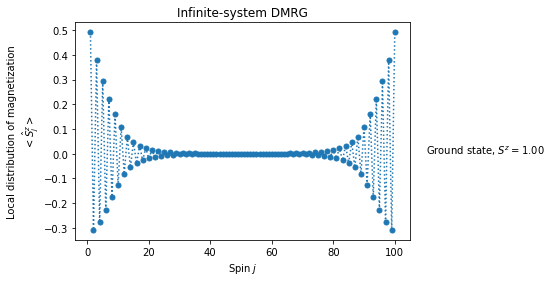

In [8]:
# <GS|S^z_j|GS>
Szj_gs = [np.matmul(np.matmul(psi.conj().T,Szj[j]),psi) for j in range(len(Szj))]

# plot
jlist = [j for j in range(1,len(Szj_gs)+1)]
plt.title('Infinite-system DMRG')
plt.xlabel('Spin $j$')
plt.ylabel('Local distribution of magnetization\n$<\hat{S}^z_j>$')
plt.text(Nspins+10,0,'Ground state, $S^z = %.2f$' %sum(Szj_gs))
plt.plot(jlist,Szj_gs,markersize=10,marker=".",linestyle="dotted")
plt.show()

$\quad$ We observe that the magnetization is exponentially localized at the edges of the chain. This is a signature of the emergence of fractional spin-1/2 edge states.